## IAI - GroupProject

# Phase 1: Data Preprocessing and Baseline 1 - AlexNet


In [1]:
import matplotlib.pyplot as plt
from collections import OrderedDict

from copy import deepcopy
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms, models


#### 1.1. Preview some images
Use PIL library to preview images

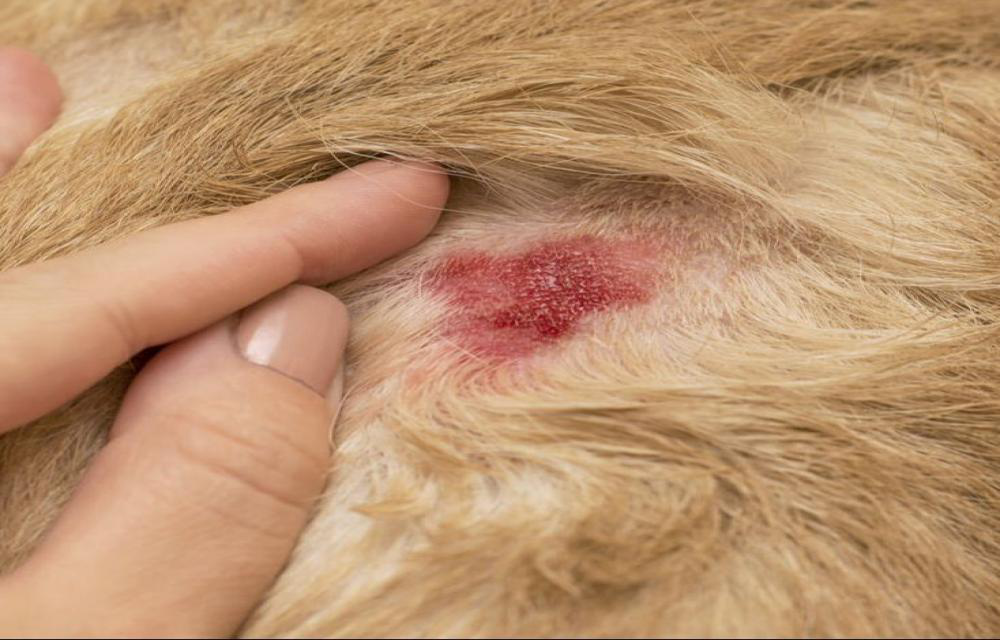

In [2]:
from PIL import Image  #show one example of image

Image.open("skin_data/hotspot/hotspot (1).jpg")

### 1.2 Add three dataset (into new / join old) categories
### The 'PetWellDogCVProject' dataset

In [4]:
import pandas as pd
import shutil
import os

csv_path = 'PetWellDogCVProject-cleaned/_classes.csv'

image_src_folder = 'PetWellDogCVProject-cleaned/train'

output_base_folder = 'skin_data_tuned'

# mapping
label_mapping = {
    'dermatitis': 'hotspot',
    'fine': 'healthy',
    'flea_allergy': 'flea_allergy',
    'ringworm': 'ringworm',
    'scabies': 'mange'
}

df = pd.read_csv(csv_path)

for _, row in df.iterrows():
    filename = row['filename']
    for label in label_mapping:
        if row[label] == 1:
            src_path = os.path.join(image_src_folder, filename)
            dest_folder = os.path.join(output_base_folder, label_mapping[label])
            os.makedirs(dest_folder, exist_ok=True)
            dest_path = os.path.join(dest_folder, filename)
            try:
                shutil.copy(src_path, dest_path)
                print(f"Copied {filename} to {dest_folder}")
            except FileNotFoundError:
                print(f"File not found: {src_path}")
            break


File not found: PetWellDogCVProject-cleaned/train\hotspot-19-_jpg.rf.81b5fef587f09938c89a10bd2d3a0c96.jpg
Copied 1000010494_x16_jpg.rf.81aa19b9cc088255ea4a56cfa63a4147.jpg to skin_data_tuned\hotspot
File not found: PetWellDogCVProject-cleaned/train\ringworm-47-_jpg.rf.850332ec24fe12d0a13afa00fda9d6b6.jpg
Copied HOT-SPOT-IN-DOG-HOW-vet-treated-symptom-prevention_-flea-bite-moist-eczema_dog-itching-000361_png_jpg.rf.84c0e5f09ee6d1443c55793e452f21b7.jpg to skin_data_tuned\mange
Copied Image_24_jpg.rf.84d091594fde2d20572bbc543d7f2f38.jpg to skin_data_tuned\healthy
File not found: PetWellDogCVProject-cleaned/train\mange-17-_jpg.rf.84855e1500abd43c3a69e0e07af436a7.jpg
File not found: PetWellDogCVProject-cleaned/train\flea_allergy-52-_jpg.rf.8275f206fb74295ac895f3046728b0f0.jpg
File not found: PetWellDogCVProject-cleaned/train\HOT-SPOT-IN-DOG-HOW-vet-treated-symptom-prevention_-flea-bite-moist-eczema_dog-itching-000500_png_jpg.rf.88da60466d6ae8ce59b3205bcf6a58a8.jpg
Copied Image_25_jpg.rf.853

### The 'DogSkinDisCVProject' dataset

PetWellDogCVProject-cleaned/ <br>
├── train/<br>
│   ├── train.csv<br>
│   ├── images/<br>
│       ├── image1.jpg<br>
│       ├── ...<br>
├── test/<br>
│   ├── test.csv<br>
│   ├── images/<br>
├── valid/<br>
│   ├── valid.csv<br>
│   ├── images/<br>


In [6]:
base_dir = 'DogSkinDisCVProject-cleaned'

output_dir = 'skin_data_tuned'

label_map = {
    'HEALTHY': 'healthy',
    'HOTSPOT': 'hotspot',
    'MALASSEZIA_DERMATITIS': 'malassezia_dermatitis',
    'PYODERMA': 'pyoderma',
    'RINGWORM': 'ringworm'
}

splits = ['train', 'test', 'valid']

for split in splits:
    print(f"\n----Doing: {split}")
    
    csv_path = os.path.join(base_dir, split, '_classes.csv')
    image_folder = os.path.join(base_dir, split)

    if not os.path.exists(csv_path):
        print(f"CSV not exist: {csv_path}")
        continue

    df = pd.read_csv(csv_path)

    for _, row in df.iterrows():
        filename = row['filename']

        label_col = row.drop('filename')
        label = label_col[label_col == 1].index[0]
        
        if label not in label_map:
            continue

        mapped_label = label_map[label]

        src_path = os.path.join(image_folder, filename)
        dest_folder = os.path.join(output_dir, mapped_label)
        dest_path = os.path.join(dest_folder, filename)

        os.makedirs(dest_folder, exist_ok=True)

        try:
            shutil.copy(src_path, dest_path)
        except FileNotFoundError:
            print(f"Image not exist: {src_path}")

print("\n---Done---")


----Doing: train

----Doing: test

----Doing: valid

---Done---


### The 'PetSkinDisDetectionCVProject' dataset

In [10]:
base_dir = 'PetSkinDisDetectionCVProject-cleaned'

output_dir = 'skin_data_tuned'

label_map = {
    'CutsWounds': 'cutWounds',
    'Dandruff': 'malassezia_dermatitis',
}

splits = ['train', 'test', 'valid']

for split in splits:
    print(f"\n----Doing: {split}")
    
    csv_path = os.path.join(base_dir, split, '_classes.csv')
    image_folder = os.path.join(base_dir, split)

    if not os.path.exists(csv_path):
        print(f"CSV not exist: {csv_path}")
        continue

    df = pd.read_csv(csv_path)

    for _, row in df.iterrows():
        filename = row['filename']

        label_col = row.drop('filename')
        label = label_col[label_col == 1].index[0]
        
        if label not in label_map:
            continue

        mapped_label = label_map[label]

        src_path = os.path.join(image_folder, filename)
        dest_folder = os.path.join(output_dir, mapped_label)
        dest_path = os.path.join(dest_folder, filename)

        os.makedirs(dest_folder, exist_ok=True)

        try:
            shutil.copy(src_path, dest_path)
        except FileNotFoundError:
            print(f"Image not exist: {src_path}")

print("\n---Done---")


----Doing: train
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\images-6_jpeg.rf.1bfbc32df75310588674d41bdeee85e4.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\images-4_jpeg.rf.208a8aaffbb86e0aa197f245d1038812.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\p1cdpsbq8916oc1onscsp1oqv16ov6_jpg.rf.03699b1dc13eb6a73b1d015c4e1b8772.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\Picture3_jpg.rf.c797f1d1d1fc703581269a92a73202f3.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\images-3_jpeg.rf.40f37d031681a9076671d53e5f6344de.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\istockphoto-1295722630-612x612_jpg.rf.76fd2e6b3d49455fd3361a6744507678.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\dog_open_wound_1_jpg.rf.a145382a21465700f9e702b16c3f0457.jpg
Image not exist: PetSkinDisDetectionCVProject-cleaned\train\images_jpeg.rf.c5ad7bcc1cd25d99d1a62a69866573ee.jpg
Image not exist: PetSkin

### A summary of the final dataset
### Don't worry about the imbalance; we will augmentation the images in 1.4 part

In [14]:
data_dir = 'skin_data_tuned'

categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

total = 0
for category in sorted(categories):
    category_path = os.path.join(data_dir, category)
    num_images = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
    print(f"{category:<25} : {num_images} images")
    total += num_images

print(f"\nTotal images: {total}")

cutWounds                 : 24 images
flea_allergy              : 129 images
healthy                   : 262 images
hotspot                   : 120 images
malassezia_dermatitis     : 18 images
mange                     : 126 images
ringworm                  : 142 images

Total images: 821


### 1.3 After join four datasets we split into train/val/test

In [11]:
import splitfolders


# input_folder = "skin_data"
input_folder = "skin_data_tuned"

# splitfolders.ratio(input_folder, output="split_Data", seed=42, ratio=(0.6, 0.2, 0.2), move=False)
splitfolders.ratio(input_folder, output="split_Data_tuned", seed=42, ratio=(0.6, 0.2, 0.2), move=False)


Copying files: 821 files [00:00, 1184.13 files/s]


### 1.4. Data transformation and processing

In [13]:
# Process with some data transformation, do not change
data_transforms = {
    'training': transforms.Compose([transforms.RandomResizedCrop(224), # Random crop and resize to 224x224
                                    transforms.RandomHorizontalFlip(),  # Flip image left/right randomly
                                    transforms.RandomRotation(30),  # Rotate image randomly up to 30°
                                    transforms.RandomAffine(degrees=0, shear=10),  # Shear image randomly
                                    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Change brightness, contrast, and saturation randomly
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224,
                                                          0.225])]),

    'validation': transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(
                                          [0.485, 0.456, 0.406],
                                          [0.229, 0.224, 0.225])]),

    'testing': transforms.Compose([transforms.Resize(256),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224,
                                                         0.225])])
}

# This decides how many images to process per training/validation
batch_size = 128

# train_dir = 'split_Data/train'
# test_dir = 'split_Data/test'
# valid_dir = 'split_Data/val'

train_dir = 'split_Data_tuned/train'
test_dir = 'split_Data_tuned/test'
valid_dir = 'split_Data_tuned/val'

image_datasets = {
    'training': datasets.ImageFolder(train_dir,
                                     transform=data_transforms['training']),
    'testing': datasets.ImageFolder(test_dir,
                                    transform=data_transforms['testing']),
    'validation': datasets.ImageFolder(valid_dir,
                                       transform=data_transforms['validation'])
}

dataloaders = {
    'training': torch.utils.data.DataLoader(image_datasets['training'],
                                            batch_size=batch_size,
                                            shuffle=True),
    'testing': torch.utils.data.DataLoader(image_datasets['testing'],
                                           batch_size=batch_size,
                                           shuffle=False),
    'validation': torch.utils.data.DataLoader(image_datasets['validation'],
                                              batch_size=batch_size,
                                              shuffle=True)
}

# get the length of each dataloaders; wit batch size=256, you should have 26 batches of training samples, each with 256 images 
training_len = len(dataloaders['training'])
test_len = len(dataloaders['testing'])
validation_len = len(dataloaders['validation'])
class_to_idx = image_datasets['training'].class_to_idx

print('We have ', training_len, 'batches of training images;', 'each with',
      batch_size, 'images')
print('We have ', validation_len, 'batches of validation images;', 'each with',
      batch_size, 'images')

# Let us preview size of each batch
print('Single batch', next(iter(dataloaders['training']))[0].shape)

We have  5 batches of training images; each with 128 images
We have  2 batches of validation images; each with 128 images
Single batch torch.Size([128, 3, 224, 224])


### 1.5 Try a baseline - AlexNet

In [15]:
# Transfer learning with alexnet
model = models.alexnet(pretrained=True)

C:\Users\14550\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\14550\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
# In transfer learning, we freeze the feature parameters from the original model
# The most straightforward way is to freeze their gradient update
# see https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad.html for how to set it
for param in model.parameters():
    param.requires_grad = False

print(model)

# This is the original classifier with alexnet
print()
print('Original classifier of Alexnet')
print(model.classifier)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
# now we need to replace the classifier by our datasets
# Note, fc2's out_feature should match our number of classes, which is 102

# Tip: check the original AlexNet classifier for some thoughts; they are similar.

# Defining number of hidden units in our fully connected layer
hidden_units = 4096
number_of_flowers = len(class_to_idx)

# Defining the fully connected layer that will be trained on the flower images
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(9216, hidden_units)), # this should be a Linear layer; how to connect with the pretrained model?
    ('relu', nn.ReLU()),
    ('dropout', nn.Dropout(0.5)),
    ('fc2', nn.Linear(hidden_units, number_of_flowers)), # what is the output of this layer should be
    ('output', nn.LogSoftmax(dim=1))
]))


In [18]:
# double check if the classifier of the model is updated.
model.classifier = classifier
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu): ReLU()
    (dropout): Drop

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 30
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
criterion = nn.NLLLoss() # this is the loss
print_every = 5

validation_accuracies, training_accuracies = [], []
validation_losses, training_losses = [], []

best_validation_accuracy = 0
best_model_weights = None

for e in range(epochs):

    training_loss = training_accuracy = 0
    validation_loss = validation_accuracy = 0

    model.train()
    for batch_idx, (images, labels) in enumerate(dataloaders['training']):

        # Moving images & labels to the GPU if there is one
        images, labels = images.to(device), labels.to(device)

        # Pushing batch through network, calculating loss & gradient, and updating weights
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        # Calculating metrics
        ps = torch.exp(log_ps)
        top_ps, top_class = ps.topk(1, dim=1)
        matches = (top_class == labels.view(*top_class.shape)).type(
            torch.FloatTensor)
        train_batch_accuracy = matches.mean()

        # Resetting optimizer gradient & tracking metrics
        optimizer.zero_grad()
        training_loss += loss.item()
        train_batch_loss = loss.item()
        training_accuracy += train_batch_accuracy.item()

        if batch_idx % print_every == 0:
            # First analyze the training statistics
            print('epoch', e, 'batch', batch_idx)
            print('training loss per batch', train_batch_loss)
            print('training accuracy per batch', train_batch_accuracy.item())

    # Then do the analysis for the validation only at the end of each training epochs
    model.eval()
    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(
                dataloaders['validation']):
            images, labels = images.to(device), labels.to(device)
            log_ps = model(images)
            loss = criterion(log_ps, labels)
            ps = torch.exp(log_ps)
            top_ps, top_class = ps.topk(1, dim=1)
            matches = (top_class == labels.view(*top_class.shape)).type(
                torch.FloatTensor)
            validation_batch_accuracy = matches.mean()

            # Tracking validation metrics
            validation_loss += loss.item()
            validation_batch_loss = loss.item()
            validation_accuracy += validation_batch_accuracy.item()

    # Save the best model weights so far
    # Tip: see this https://pytorch.org/tutorials/beginner/saving_loading_models.html
    if validation_accuracy >= best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        best_model_weights = deepcopy(model.state_dict())

    # Summary statistic per epoch
    print('epoch', e, 'summary')
    print('avg training loss per epoch', training_loss / training_len)
    print('avg training accuracy per epoch', training_accuracy / training_len)
    training_losses.append(training_loss / training_len)
    training_accuracies.append(training_accuracy / training_len)

    print('avg validation loss per epoch', validation_loss / validation_len)
    print('avg validation accuracy per epoch',
          validation_accuracy / validation_len)
    validation_losses.append(validation_loss / validation_len)
    validation_accuracies.append(validation_accuracy / validation_len)

    print()

epoch 0 batch 0
training loss per batch 2.173149347305298
training accuracy per batch 0.1328125
epoch 0 summary
avg training loss per epoch 24.24065022468567
avg training accuracy per epoch 0.20699404776096345
avg validation loss per epoch 22.749902725219727
avg validation accuracy per epoch 0.19508928805589676

epoch 1 batch 0
training loss per batch 28.982316970825195
training accuracy per batch 0.1484375
epoch 1 summary
avg training loss per epoch 15.540531730651855
avg training accuracy per epoch 0.25855654776096343
avg validation loss per epoch 9.534497737884521
avg validation accuracy per epoch 0.3687500059604645

epoch 2 batch 0
training loss per batch 7.849275588989258
training accuracy per batch 0.390625
epoch 2 summary
avg training loss per epoch 4.4547515392303465
avg training accuracy per epoch 0.39933035969734193
avg validation loss per epoch 3.080623984336853
avg validation accuracy per epoch 0.4102678596973419

epoch 3 batch 0
training loss per batch 3.4638378620147705
t

In [21]:
best_train_epoch = training_accuracies.index(max(training_accuracies))
best_val_epoch = validation_accuracies.index(max(validation_accuracies))

print(f"Best Training Accuracy: {max(training_accuracies):.4f} at epoch {best_train_epoch}")
print(f"Best Validation Accuracy: {max(validation_accuracies):.4f} at epoch {best_val_epoch}")

Best Training Accuracy: 0.6978 at epoch 24
Best Validation Accuracy: 0.6671 at epoch 25


### 1.6. Baseline Training curves

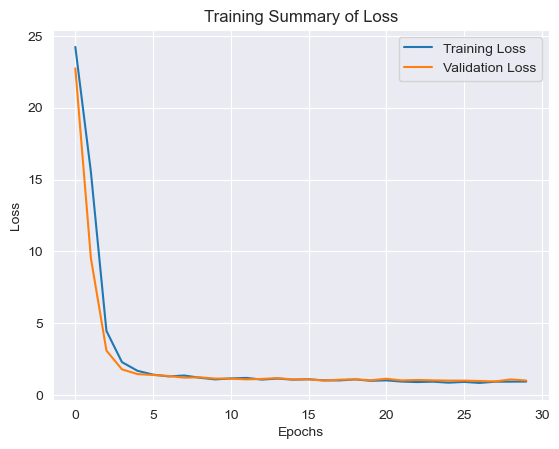

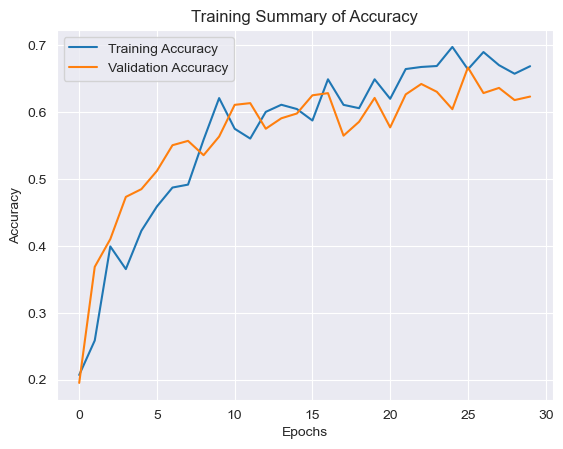

In [20]:
plt.figure()
plt.title("Training Summary of Loss")
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.title("Training Summary of Accuracy")
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.7. Baseline Test accuracy

In [22]:
# Predict on the test data

# Load the best model so far
model.load_state_dict(best_model_weights)
test_accuracy = 0

predictions = []
label_data = []

for images, labels in dataloaders['testing']:

    # Try to do similar things as validation to get the test accuracy
    images, labels = images.to(device), labels.to(device)
    log_ps = model(images)
    ps = torch.exp(log_ps)
    top_ps, top_class = ps.topk(1, dim=1)
    matches = (top_class == labels.view(*top_class.shape)).type(torch.FloatTensor)
    test_batch_accuracy = matches.mean()
    test_accuracy += test_batch_accuracy.item()

    # You also need to store the predictions and labels for all the test data, which will be used later
    # you could save them in predictions and label_data
    predictions.append(top_class)
    label_data.append(labels)

print('Test Accuracy:', test_accuracy / test_len)

Test Accuracy: 0.5750000029802322


### 1.8. Baseline (AlexNet) confusion matrix

confusion matrix
[[ 1  0  1  1  0  2  1]
 [ 0 13  2  8  0  8  2]
 [ 0  1 60  0  0  2  1]
 [ 1  5  5 16  0  2  1]
 [ 0  1  2  2  0  0  0]
 [ 0  2  3  9  0 14  2]
 [ 0  3  3  8  0  5 21]]



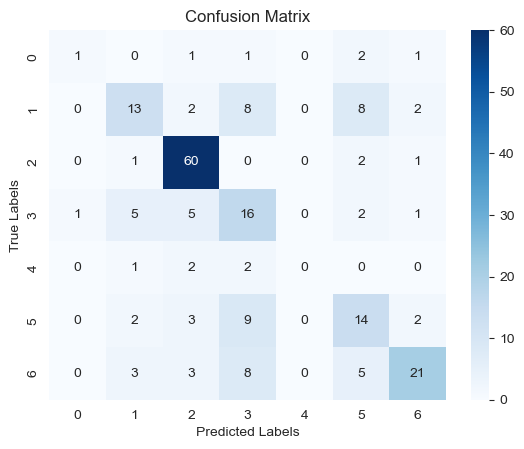

normalized confusion matrix
[[0.16666667 0.         0.16666667 0.16666667 0.         0.33333333
  0.16666667]
 [0.         0.39393939 0.06060606 0.24242424 0.         0.24242424
  0.06060606]
 [0.         0.015625   0.9375     0.         0.         0.03125
  0.015625  ]
 [0.03333333 0.16666667 0.16666667 0.53333333 0.         0.06666667
  0.03333333]
 [0.         0.2        0.4        0.4        0.         0.
  0.        ]
 [0.         0.06666667 0.1        0.3        0.         0.46666667
  0.06666667]
 [0.         0.075      0.075      0.2        0.         0.125
  0.525     ]]


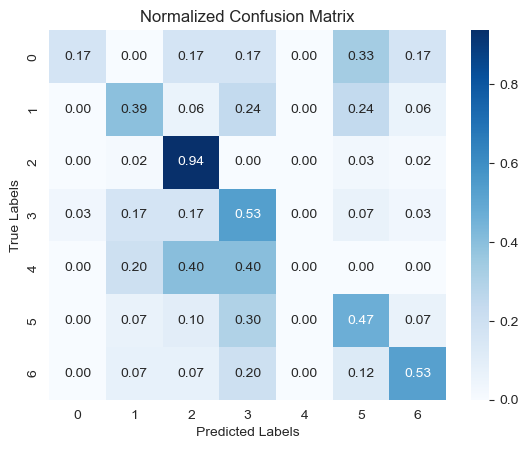

In [23]:
# Please plot the confusion matrix other than print() if possible
from sklearn.metrics import confusion_matrix as conf_mat
import numpy as np
import seaborn as sns

cf =conf_mat(torch.cat(label_data).cpu().numpy().flatten(),torch.cat(predictions).cpu().numpy().flatten())

print('confusion matrix')
print(cf)
print()
plt.figure()
sns.heatmap(cf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# normalized confusion matrix
print('normalized confusion matrix')
ncf = cf.astype("float") / cf.sum(axis=1, keepdims=True)
print(ncf)
plt.figure()
sns.heatmap(ncf, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix")
plt.show()